In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
#import plotly.grath_objs as go
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
import os


In [16]:
data = pd.read_csv("housing_price.csv",encoding='ansi')
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\761588416.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("housing_price.csv",encoding='ansi')


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,ёЯ 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,ёЯ 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ЦР 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µЧ 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ЦР 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [17]:
pd.set_option("display.max.columns", None)
data.head()


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,ёЯ 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,ёЯ 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ЦР 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µЧ 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ЦР 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


Наши данные представляют цены на жильё в Пекине. Для нашей кластеризации возьмём "DOM"(количество дней на рынке),"	price"(подписчики),"totalPrice"(общая стоимость),"squarе"(площадь),"communityAverage"(общая цена сообщества)

In [76]:
data2 = data[["DOM", "price", "totalPrice", "square", "communityAverage"]]
data2

,DOM,price,totalPrice,square,communityAverage
0,1464.0,31680,415.0,131.00,56021.0
1,903.0,43436,575.0,132.38,71539.0
2,1271.0,52021,1030.0,198.00,48160.0
3,965.0,22202,297.5,134.00,51238.0
4,927.0,48396,392.0,81.00,62588.0
...,...,...,...,...,...
318846,1.0,20580,350.0,170.07,36545.0
318847,NaN,31006,108.8,35.09,54282.0
318848,1.0,35138,359.0,102.17,46927.0
318849,NaN,40373,720.0,178.34,54842.0


In [77]:
data2.drop_duplicates()
mas=[i for i in data2.columns if data2[i].dtypes=='float64' or data2[i].dtypes=='int64']
for i in mas:
    if data2[i].isnull().sum()>0:
        data2[i]=data2[i].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\3443182581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i]=data2[i].fillna(0)


In [78]:
data2[i].isna().any()


False

In [79]:
data3 = data2.head(10000)
data3

,DOM,price,totalPrice,square,communityAverage
0,1464.0,31680,415.0,131.00,56021.0
1,903.0,43436,575.0,132.38,71539.0
2,1271.0,52021,1030.0,198.00,48160.0
3,965.0,22202,297.5,134.00,51238.0
4,927.0,48396,392.0,81.00,62588.0
...,...,...,...,...,...
9995,92.0,43962,285.0,64.83,59797.0
9996,50.0,44351,199.0,44.87,56242.0
9997,70.0,44967,285.0,63.38,52870.0
9998,27.0,48777,590.0,120.96,66300.0


Метод KMEANS

Text(0, 0.5, 'WCSS')

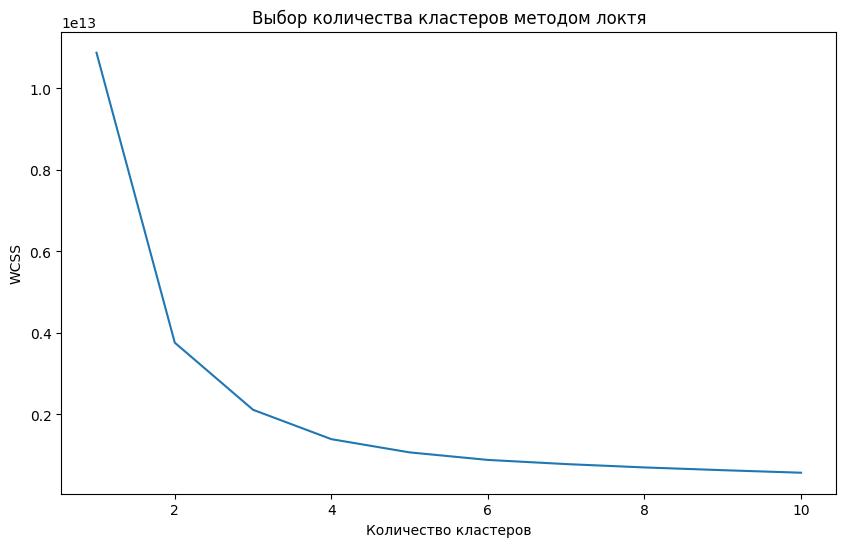

In [81]:
x1 = data3[["DOM", "price", "totalPrice", "square", "communityAverage"]]
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
# воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):
    # настроим параметры модели 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(x1)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize=(10, 6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')


На графике видим что, перейдя от 5 до 6 кластеров,ошибка перестала существенно уменьшаться. Поэтому возьмём 5 кластеров.

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++',
                max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(x1)


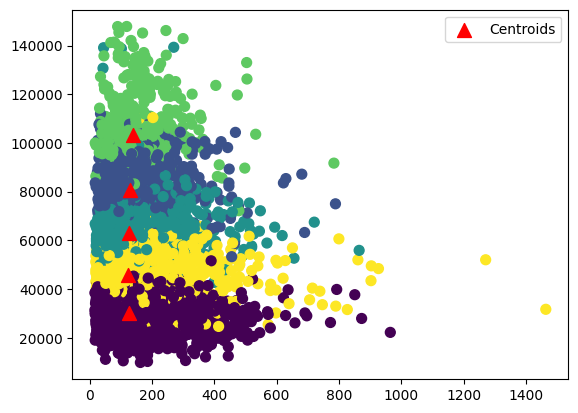

In [83]:
#plt.figure(figsize=(10, 6))

# построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c=y_pred, s=50)

# выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 150, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='red', marker='^', label='Centroids')

# укажем, где разместить подпись
plt.legend(loc='upper right')


Метод DBSCAN

In [95]:
x = data3.loc[:, ["DOM", "price", "totalPrice", "square",
                  "communityAverage"]].values
x.shape


(10000, 5)

In [178]:
dbscan = DBSCAN(eps=2, min_samples=1).fit(x)  # подгонка модели
labels = dbscan.labels_


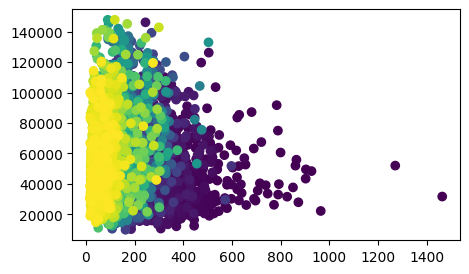

In [179]:
# построение графиков кластеров
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.show()


График в параллельных координатах

In [196]:
from pandas.plotting import parallel_coordinates
x2 = data3.drop(columns=["DOM"])

kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(x2)

x_kmeans = pd.DataFrame(kmeans)


x_kmeans1 = pd.concat([x2, x_kmeans], axis=1)
x_kmeans1


,price,totalPrice,square,communityAverage,0
0,31680,415.0,131.00,56021.0,4
1,43436,575.0,132.38,71539.0,4
2,52021,1030.0,198.00,48160.0,4
3,22202,297.5,134.00,51238.0,0
4,48396,392.0,81.00,62588.0,4
...,...,...,...,...,...
9995,43962,285.0,64.83,59797.0,4
9996,44351,199.0,44.87,56242.0,4
9997,44967,285.0,63.38,52870.0,4
9998,48777,590.0,120.96,66300.0,4


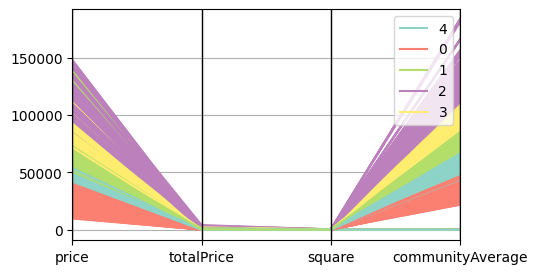

In [202]:
x_kmeans1.rename(columns={x_kmeans1.columns[4]: "Cluster"}, inplace=True)
parallel_coordinates(x_kmeans1, 'Cluster',
                     colormap=plt.get_cmap("Set3"))
plt.show()


In [204]:
import plotly.express as px

fig = px.parallel_coordinates(
    x_kmeans1,
    color="Cluster",
    labels={"Cluster": "Cluster", "price": "price", "totalPrice": "totalPrice",
            "square": "square", "communityAverage": "communityAverage"},
            color_continuous_scale=px.colors.diverging.Tealrose,
            color_continuous_midpoint=2)

fig.update_layout(coloraxis_showscale=False)

fig.show()


Двумерные и трёхмерные графики

In [225]:
data4 = data2.head(1000)
data4

,DOM,price,totalPrice,square,communityAverage,cluster,cen_x,cen_y,c
0,1464.0,31680,415.0,131.00,56021.0,1,33243.163341,52284.032418,#81DF20
1,903.0,43436,575.0,132.38,71539.0,1,33243.163341,52284.032418,#81DF20
2,1271.0,52021,1030.0,198.00,48160.0,1,33243.163341,52284.032418,#81DF20
3,965.0,22202,297.5,134.00,51238.0,1,33243.163341,52284.032418,#81DF20
4,927.0,48396,392.0,81.00,62588.0,1,33243.163341,52284.032418,#81DF20
...,...,...,...,...,...,...,...,...,...
995,152.0,28281,350.0,123.76,39995.0,1,33243.163341,52284.032418,#81DF20
996,292.0,118249,1550.0,131.08,104368.0,0,67210.329098,89614.701213,#DF2020
997,240.0,60779,2650.0,436.01,100306.0,0,67210.329098,89614.701213,#DF2020
998,307.0,102709,910.0,88.60,120447.0,0,67210.329098,89614.701213,#DF2020


Графики для 2 переменных

In [226]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
data4['cluster'] = kmeans.fit_predict(data4[['DOM', 'communityAverage']])
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
data4['cen_x'] = data4.cluster.map({0:cen_x[0], 1:cen_x[1]})
data4['cen_y'] = data4.cluster.map({0:cen_y[0], 1:cen_y[1]})
colors = ['#DF2020', '#81DF20']
data4['c'] = data4.cluster.map({0:colors[0], 1:colors[1]})

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\2040169731.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\2040169731.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\2040169731.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

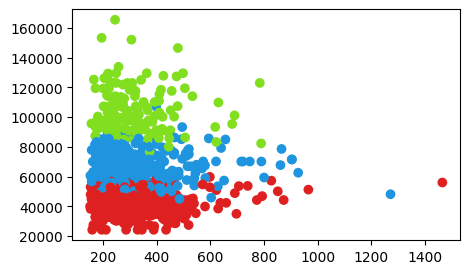

In [233]:
plt.scatter(data4.DOM, data4.communityAverage, c=data4.c)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\1060143035.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\1060143035.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



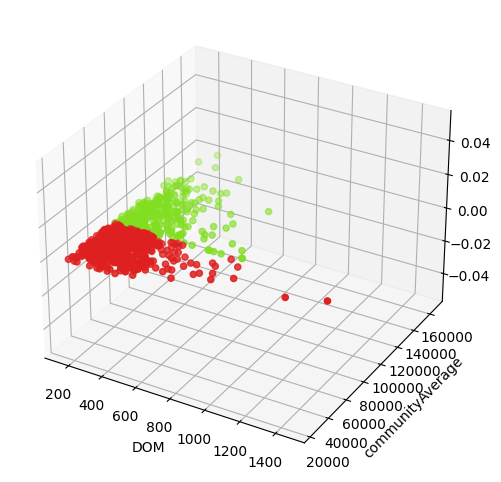

In [228]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
colors = ['#DF2020', '#81DF20']
kmeans = KMeans(n_clusters=2, random_state=0)
data4['cluster'] = kmeans.fit_predict(data4[['DOM', 'communityAverage']])
data4['c'] = data4.cluster.map({0: colors[0], 1: colors[1]})
fig = plt.figure(figsize=(26, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data4.DOM, data4.communityAverage, c=data4.c, s=20)
ax.set_xlabel('DOM')
ax.set_ylabel('communityAverage')
plt.show()


In [229]:
kmeans = KMeans(n_clusters=3, random_state=0)
data4['cluster'] = kmeans.fit_predict(
    data4[['price', 'communityAverage', 'square']])
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
data4['cen_x'] = data4.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
data4['cen_y'] = data4.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})
colors = ['#DF2020', '#81DF20', '#2095DF']
data4['c'] = data4.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\3167256594.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\3167256594.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\3167256594.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

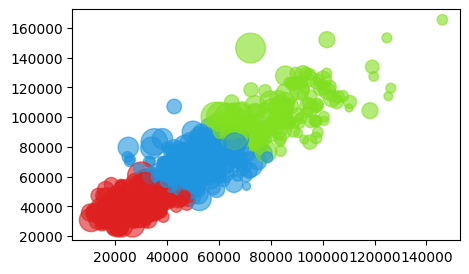

In [231]:
plt.scatter(data4.price, data4.communityAverage,
            data4.square, c=data4.c, alpha=0.6)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\3965442500.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_2376\3965442500.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



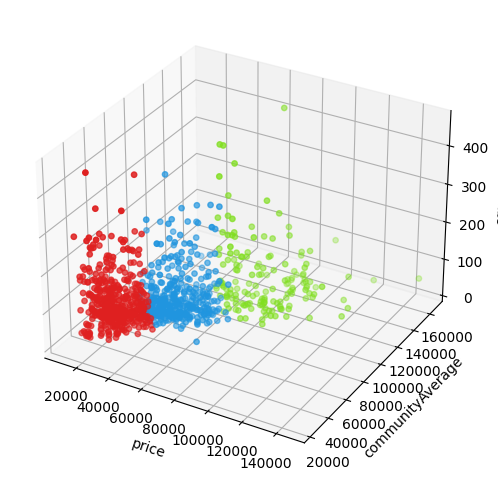

In [232]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
data4['cluster'] = kmeans.fit_predict(
    data4[['price', 'communityAverage', 'square']])
data4['c'] = data4.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})
fig = plt.figure(figsize=(26, 6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data4.price, data4.communityAverage, data4.square, c=data4.c, s=15)
ax.set_xlabel('price')
ax.set_ylabel('communityAverage')
ax.set_zlabel('square')
plt.show()
